# IFRS17 Simulation (Baseline)

If you're viewing this page as a static HTML page on https://lifelib.io, the same contents are also available [here on binder] as Jupyter notebook executable online (it may take a while to load)

To run this notebook and get all the outputs below, Go to the **Cell** menu above, and then click **Run All**.

[here on binder]: https://mybinder.org/v2/gh/fumitoh/lifelib/binder?filepath=lifelib%2Fprojects%2Fifrs17sim%2Fifrs17sim_charts_baseline.ipynb

## About this notebook

This noteook demonstrates the usage of [ifrs17sim] project in [lifelib], by building and running a model and drawing waterfall graphs that depict how balancesheet items change and cashflows emerge over one or multiple periods using cashflows of a single modelpoint.

Those charts are:
* Present value of expected cashflows
* CSM amortization
* Actual cashflows
* IFRS17 Financial performance

under the senario that actual cashflows are equal to expected. 

[ifrs17sim]: https://lifelib.io/projects/ifrs17sim.html
[lifelib]: https://lifelib.io

<div class="alert alert-warning">

**Warning:**

The primary purpose of this model is to showcase the capability of [lifelib] and its base system [modelx], and less attention has been paid to the accuracy of the model or the compliance with the accounting standards. 
At very least, following items are identified as over-simplification or lack of implementation.

<ul>
  <li>The timing of cashflows is either the beginning or end of each step.</li>
  <li>All expenses are included in insurance cashflows.</li>
  <li>Loss component logic is not yet incorporated, so `CSM` can be negative.</li>
  <li>Coverage unit is set to sum assured</li>
  <li>The amortization schedule of acquisition cashflows is constant over time.</li>
  <li>All insurance cashflows are considered non-market sensitive, i.e. no TVOG is considered.</li>
  <li>Risk adjustment is not yet modeled.</li>
</ul>

</div>

[modelx]: http://docs.modelx.io

## How to use Jupyter Notebook
Jupter notebook enables you to run a Python script piece by piece. You can run each piece of code (called a "cell") by putting the cursor in the cell and pressing **Shift + Enter**, and get the output right below the input code of the cell.

If you want to learn more about Jupyter Notebook, [this tutorial] will help you. There are also plenty of other resources on the internet as Jupyter Notebook is quite popular.

[this tutorial]: https://nbviewer.jupyter.org/github/jupyter/notebook/blob/master/docs/source/examples/Notebook/Running%20Code.ipynb

## Initial set-up

The first line `%matplotlib notebook`, is for specifying drawing mode.

The next few lines are import statements, by which functions defined in other modules become avaialbe in this script.

`ifrs17sim` and `draw_charts` modules are in the project directory of this project. To see what fiels are in the project directory, select **Open** from the **File** menu in the tool bar above.

In [1]:
%matplotlib notebook
import pandas as pd
import collections
import matplotlib.pyplot as plt
from draw_charts import draw_waterfall, get_waterfalldata

## Building the model

The next line is to create a model from `build` function defined in `ifrs17sim` module which has just been imported. 

By supplying `True` to `load_saved` parameter of the `build` function, the input data is read from `ifrs17sim.mx`, the 'pickled' file to save loading time. To read input from `input.xlsm`, call `build` with `load_saved=False` or without any parameter because `False` is the default value of `load_saved`. 

If you run this code multiple time, the previous model is renamed to `ifrs17sim_BAK*`, and a new model is created and returned as `model`.

In `model` thre is a space called `OuterProj` and other spaces. `OuterProj` is parametrized by Policy ID, i.e. each of the spaces with parameters corresponds to a projection of one policy. For example, `model.OuterProj[1]` return the projection of policy ID 1, `model.OuterProj[171]` return the projection of policy ID 171.

The first line below sets `proj` as a shorthand for the projection of Policy ID 1. To see what cells are in `proj`, execute `proj.cells` in an empty cell. 
```python
proj.cells
```

You can change the sample policy to output by supplying some other ID.

In [2]:
import modelx as mx
model = mx.read_model("model")
proj = model.OuterProj[1]

## Present value of expected cashflows

The code below generate a waterfall chart that shows how the present value of expected insurance cashflows unwinds over time. No adjustment is made to match actual in-force and no changes in assumptions are made.

<IPython.core.display.Javascript object>


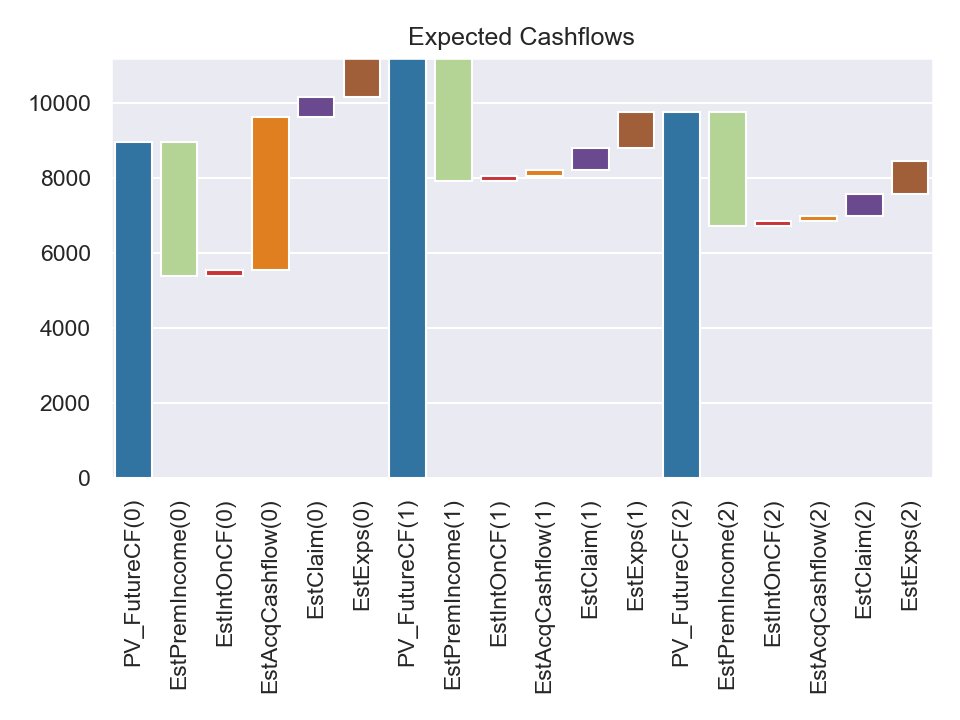

<AxesSubplot:title={'center':'Expected Cashflows'}>

In [3]:
estcf = get_waterfalldata(
            proj,
            items=['PV_FutureCF',
                   'EstPremIncome',
                   'EstIntOnCF',
                   'EstAcqCashflow',
                   'EstClaim',
                   'EstExps'],
            length=3,
            reverseitems=['EstPremIncome'])

draw_waterfall(estcf, title='Expected Cashflows')

## CSM amortization

The CSM amortization chart below depicts items that increase/decrease CSM balance under the senario that actual cashflows are equal to expected. 
The chart below is explained in more details in another notebook.

<IPython.core.display.Javascript object>


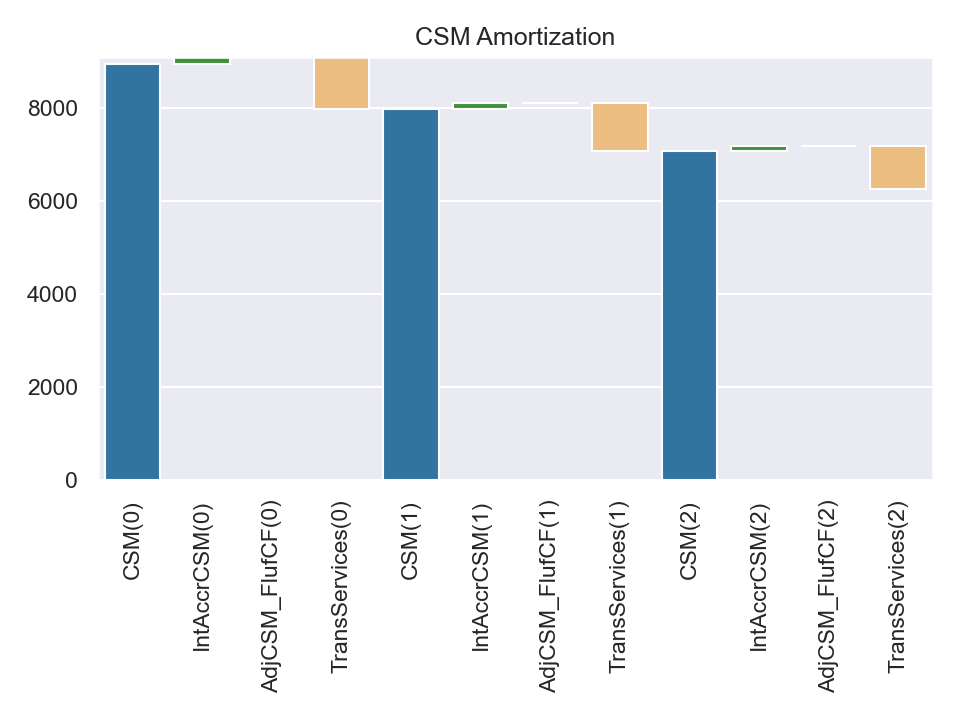

<AxesSubplot:title={'center':'CSM Amortization'}>

In [4]:
csmrf = get_waterfalldata(
            proj, 
            items=['CSM',
                   'IntAccrCSM',
                   'AdjCSM_FlufCF',
                   'TransServices'],
            length=3,
            reverseitems=['TransServices'])

draw_waterfall(csmrf, title='CSM Amortization')

## Actual cashflows

The code below generate a waterfall chart that simulate actual insurance cashflows that are assumed to be equal to the expected. The net cashflow of each period is withheld as accumulated cashflow and credited with interests at the same rate as the discount rate.

<IPython.core.display.Javascript object>


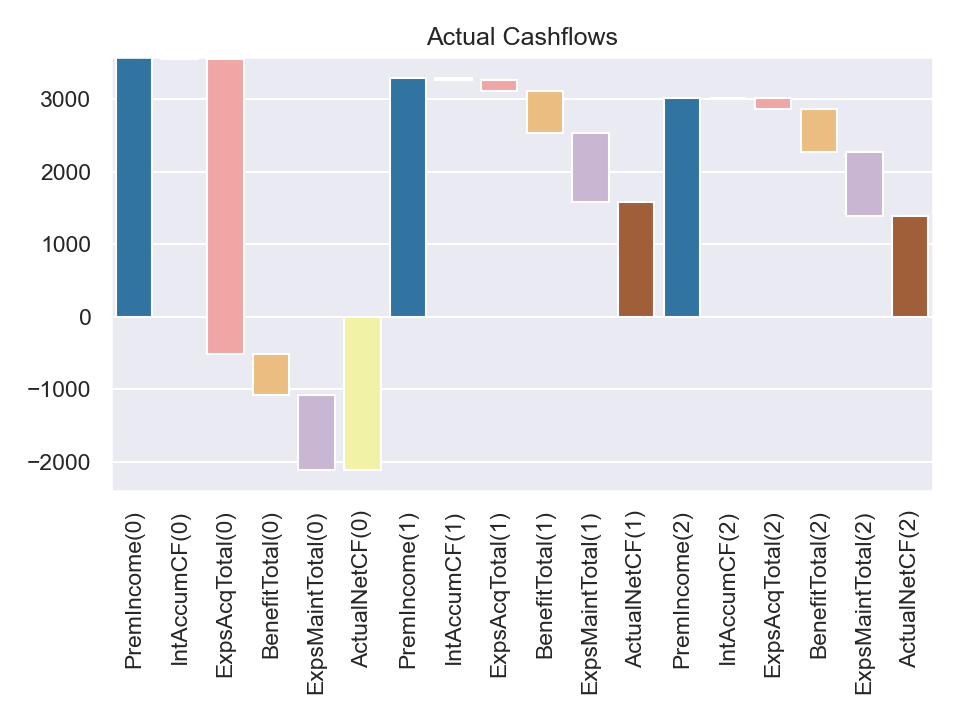

<AxesSubplot:title={'center':'Actual Cashflows'}>

In [5]:
actcf = get_waterfalldata(
            proj,
            items=['PremIncome',
                   'IntAccumCF',
                   'ExpsAcqTotal',
                   'BenefitTotal',
                   'ExpsMaintTotal',
                   'ActualNetCF'],
            length=3,
            reverseitems=['ExpsAcqTotal',
                          'BenefitTotal',
                          'ExpsMaintTotal'])
    
draw_waterfall(actcf, stocks=[0, 5], title='Actual Cashflows')

## IFRS17 Financial performance

The chart below simulates P&L accounts based on IFRS17 from the background data used to draw the charts above. The profit in each period is retained and accumulated as `NetBalance`

<IPython.core.display.Javascript object>


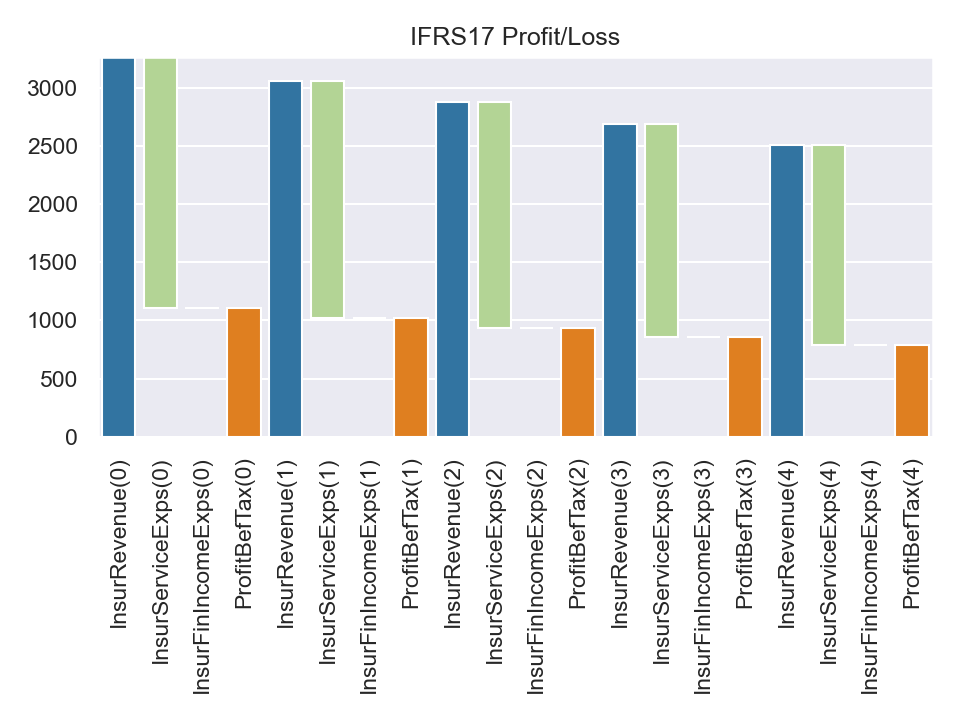

<AxesSubplot:title={'center':'IFRS17 Profit/Loss'}>

In [6]:
ifrspl = get_waterfalldata(
            proj,
            items=['InsurRevenue',
                   'InsurServiceExps',
                   'InsurFinIncomeExps',
                   'ProfitBefTax'],
            length=5,
            reverseitems=['InsurServiceExps'])

draw_waterfall(ifrspl, stocks=[0, 3], title='IFRS17 Profit/Loss')